---
---
## Perkenalan

Nama    : I Made Dhanan Pradipta <br>
Batch   : 10

Objective   : 
    Mampu memahami konsep Classification dengan Ensemble Model.
    Mampu mempersiapkan data untuk digunakan dalam Ensemble Model.
    Mampu mengimplementasikan Ensemble Model untuk membuat prediksi.

Dataset : heart_failure_clinical_records_dataset.csv


---
---
## Import Library

In [512]:
#library for data processing
import pandas as pd
import numpy as np

#library fo visualization
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import winsorize

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

#model library linear model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#model library evaluation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#model library tuning hyperparameter
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [513]:
import warnings

warnings.filterwarnings('ignore')

---
---
## Data Loading

In [514]:
df = pd.read_csv('dataset/heart_failure_clinical_records_dataset.csv')

In [515]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [517]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [600]:
heart_df = df.copy()

#### Note   :

Keterangan pada column :
- Sex - Gender of patient Male = 1, Female =0
- Age - Age of patient
- Diabetes - 0 = No, 1 = Yes
- Anaemia - 0 = No, 1 = Yes
- High_blood_pressure - 0 = No, 1 = Yes
- Smoking - 0 = No, 1 = Yes
- DEATH_EVENT - 0 = No, 1 = Yes






---
---
## Exploratory Data Analysis (EDA)

#### Step by Step :
1.  Target Analysis
2.  Variable Analysis
3.  Check Missing value
4.  Check outlier
5.  Correlation

---
1.  Target Analysis

    - DEATH_EVENT - 0 = No, 1 = Yes

In [519]:
heart_df.DEATH_EVENT.unique()

array([1, 0], dtype=int64)

In [520]:
heart_count = heart_df.groupby('DEATH_EVENT').size().reset_index(name="counts")

   DEATH_EVENT  counts
0            0     203
1            1      96


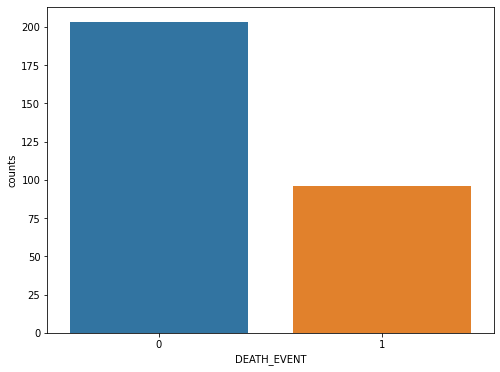

In [521]:
print(heart_count)
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="DEATH_EVENT", y="counts", data=heart_count)

In [522]:
heart_df.drop(['time'], axis=1, inplace=True)

#### Note   :

1.  Tingkat kematian akibat cardiovascular disease (CVD) berjumlah 96 orang, dan yang tidak berjumlah 203 orang
2.  Menurut refrensi, bahwa dikatakan kolom `time` highly effected terhadap target, sehingga perlu utk didrop

---
2.  Variable Analysis

In [523]:
heart_df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')

-   Sex (Gender of patient, Male = 1, Female = 0) 

In [616]:
gender_count = heart_df.groupby(['sex', 'smoking', 'diabetes']).size().reset_index(name="counts")

In [636]:
#gender
male = heart_df[heart_df['sex'] == 1]
female = heart_df[heart_df['sex'] == 0]

male_survived = male[male['DEATH_EVENT'] == 1]
female_survived = female[female['DEATH_EVENT'] == 1]

labels_gender = ['male survived', 'male not survived', 'female survived', 'female not survived']
value_gender = [len(male_survived), (len(male) - len(male_survived)), len(female_survived), (len(female) - len(female_survived))]

#diabetes
diab = heart_df[heart_df['diabetes'] == 1]
n_diab = heart_df[heart_df['diabetes'] == 0]

diab_survived = diab[diab['DEATH_EVENT'] == 1]
n_diab_survived = n_diab[n_diab['DEATH_EVENT'] == 1]

labels_diab = ['diabetes survived', 'diabetes not survived', 'not diabetes survived', 'not diabetes not survived']
value_diab = [len(diab_survived), (len(diab) - len(diab_survived)), len(n_diab_survived), (len(n_diab) - len(n_diab_survived))]

#anaemia
anae = heart_df[heart_df['anaemia'] == 1]
n_anae = heart_df[heart_df['anaemia'] == 0]

anae_survived = anae[anae['DEATH_EVENT'] == 1]
n_anae_survived = n_anae[n_anae['DEATH_EVENT'] == 1]

labels_anae = ['anaemia survived', 'anaemia not survived', 'not anaemia survived', 'not anemia not survived']
value_anae = [len(anae_survived), (len(anae) - len(anae_survived)), len(n_anae_survived), (len(n_anae) - len(n_anae_survived))]

#hbp
hbp = heart_df[heart_df['high_blood_pressure'] == 1]
n_hbp = heart_df[heart_df['high_blood_pressure'] == 0]

hbp_survived = hbp[hbp['DEATH_EVENT'] == 1]
n_hbp_survived = n_hbp[n_hbp['DEATH_EVENT'] == 1]

labels_hbp = ['HBP survived', 'HBP not survived', 'not HBP survived', 'not HBP not survived']
value_hbp = [len(hbp_survived), (len(hbp) - len(hbp_survived)), len(n_hbp_survived), (len(n_hbp) - len(n_hbp_survived))]


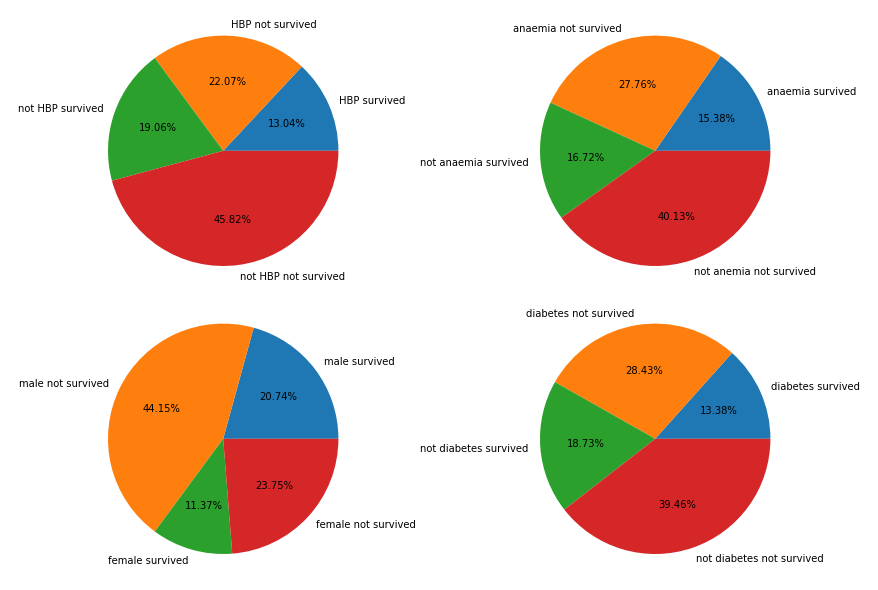

In [646]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(value_gender, labels = labels_gender,autopct='%1.2f%%')
fig.set_facecolor('white')

ax = fig.add_axes([1,0,1,1])
ax.axis('equal')
ax.pie(value_diab, labels = labels_diab,autopct='%1.2f%%')
fig.set_facecolor('white')

ax = fig.add_axes([1,1,1,1])
ax.axis('equal')
ax.pie(value_anae, labels = labels_anae,autopct='%1.2f%%')
fig.set_facecolor('white')

ax = fig.add_axes([0,1,1,1])
ax.axis('equal')
ax.pie(value_hbp, labels = labels_hbp,autopct='%1.2f%%')
fig.set_facecolor('white')
plt.show()

#### Note   :

1.  Pada bagian gender, pasien paling banyak berasal dari pasien pria yang menderita CVD hingga meninggal sebesar 44.15%
2.  Pada bagian HBP, pasian paling banyak tidak menderita HBP namun memiliki CVD hingga meningal sebesar 45.82%
3.  pada bagian anemia, paling banyak pasien yang tidak menderita anemia, namun mengalami CVD sampai meninggal sebesar 40.13%
4.  pada bagian diabetes, paling banyak pasien yang tidak mengalami diabetes namun mengalami CVD hingga meninggal sebesar 39.36

In [661]:
viz_df = heart_df[['creatinine_phosphokinase','ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'DEATH_EVENT']]

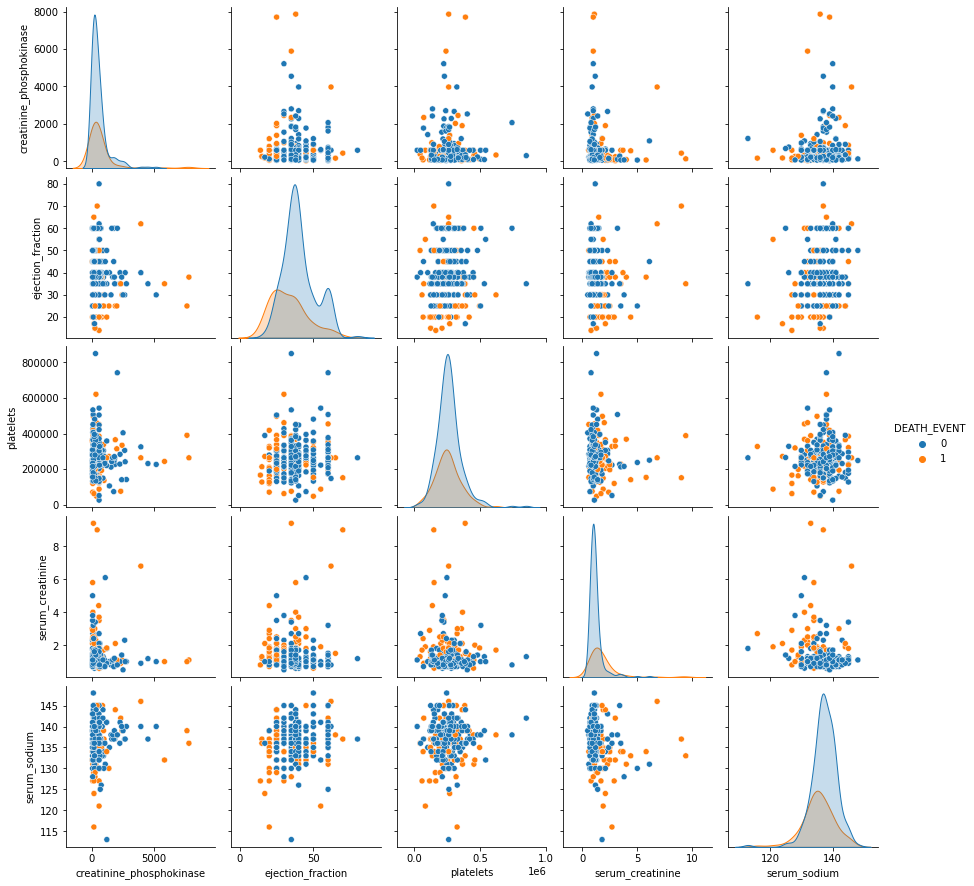

In [662]:
sns.pairplot(viz_df, hue='DEATH_EVENT')

#### Note   :
1.  Korelasi pada visualisai diatas, menggambarkan yang paling menonjol adalah `serum sodium` semakin besar, semakin besar pula angka kematian pada pasien
2.  untuk column yang lainya, persebaran datanya tidak terlalu terlihat jelas, antara berbanding lurus atau berlawanan

In [526]:
heart_df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

- tidak terdapat missing value pada data

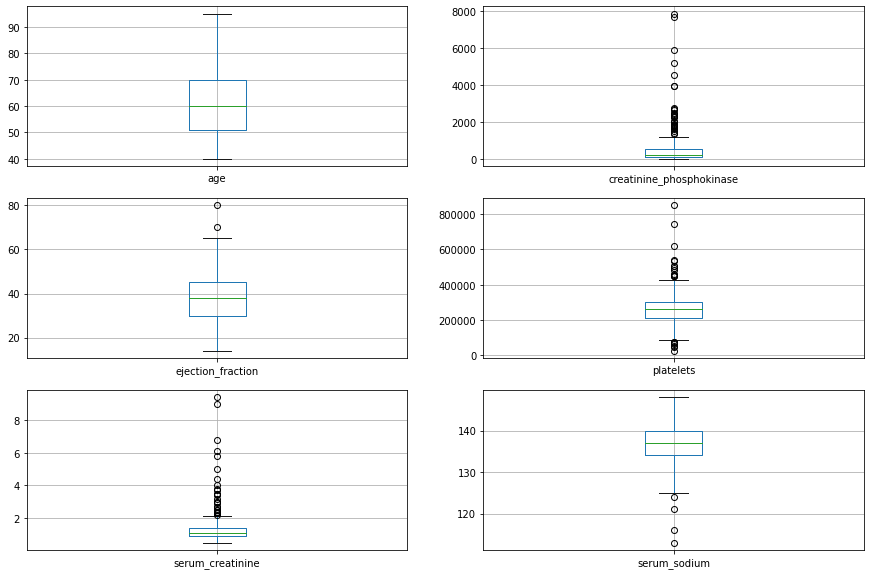

In [527]:
#make visualization of num columns on boxplot
plt.figure(figsize=(15,10))

plt.subplot(3, 2, 1)
fig = heart_df.boxplot(column='age')


plt.subplot(3, 2, 2)
fig = heart_df.boxplot(column='creatinine_phosphokinase')


plt.subplot(3, 2, 3)
fig = heart_df.boxplot(column='ejection_fraction')


plt.subplot(3, 2, 4)
fig = heart_df.boxplot(column='platelets')


plt.subplot(3, 2, 5)
fig = heart_df.boxplot(column='serum_creatinine')


plt.subplot(3, 2, 6)
fig = heart_df.boxplot(column='serum_sodium')


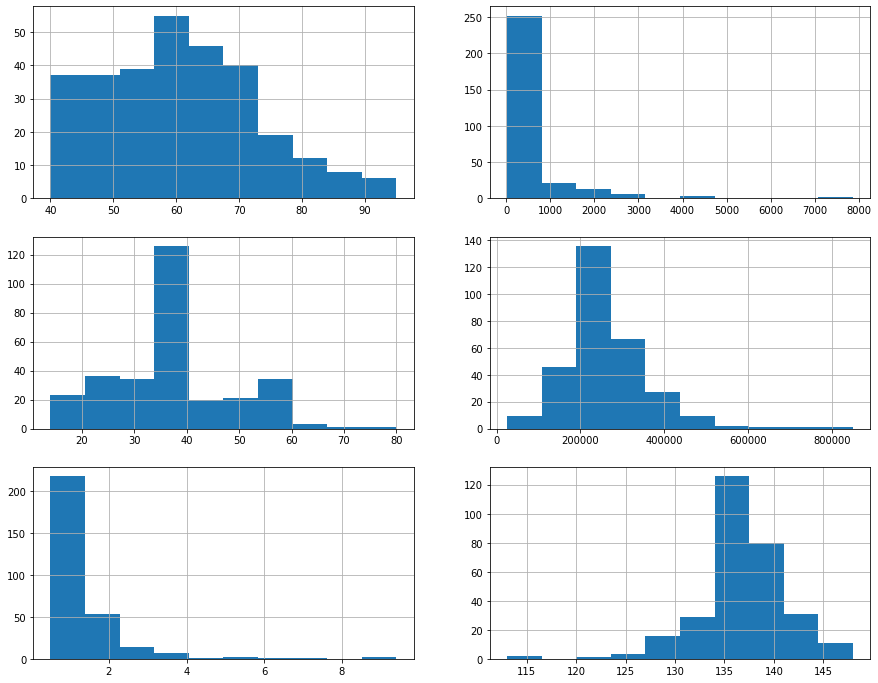

In [528]:
plt.figure(figsize=(15,12))


plt.subplot(3, 2, 1)
fig = heart_df['age'].hist(bins=10)


plt.subplot(3, 2, 2)
fig = heart_df['creatinine_phosphokinase'].hist(bins=10)

plt.subplot(3, 2, 3)
fig = heart_df['ejection_fraction'].hist(bins=10)

plt.subplot(3, 2, 4)
fig = heart_df['platelets'].hist(bins=10)


plt.subplot(3, 2, 5)
fig = heart_df['serum_creatinine'].hist(bins=10)


plt.subplot(3, 2, 6)
fig = heart_df['serum_sodium'].hist(bins=10)


#### Note   :
1.  Terdapat outlier pada kolom `creatinine_phosphokinase`, `ejection_fraction`, `platelets`, `serum_sodium`
2.  Bentuk distribusi rata-rata right-skew, hanya `serum_sodium` yang left-skew

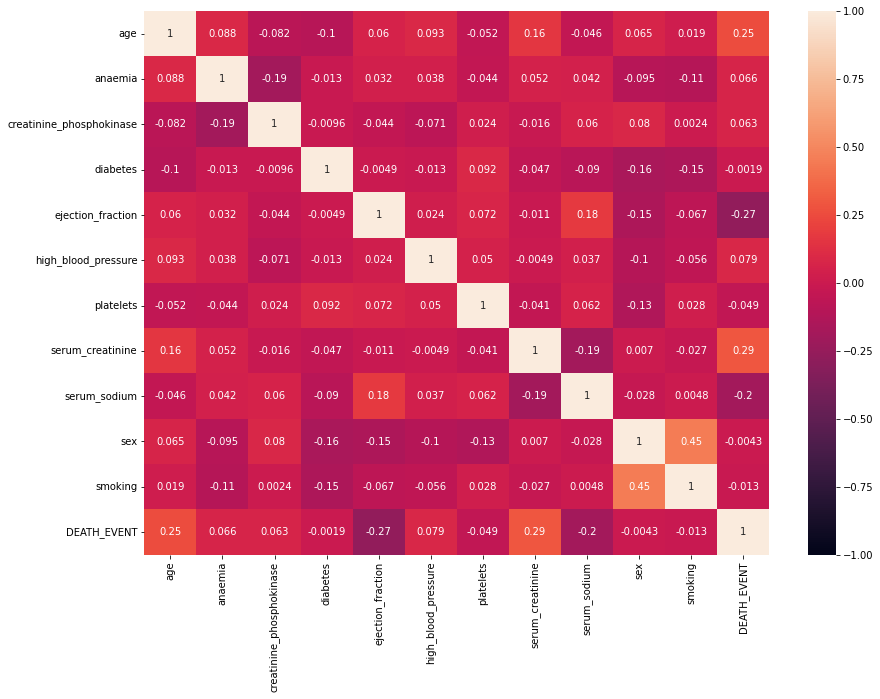

In [529]:
plt.figure(figsize=(14,10))
sns.heatmap(heart_df.corr(), vmin=-1, annot=True);

In [530]:
heart_df.drop('sex', axis=1, inplace=True)

#### Note   :
1.  Korelasi antara feature dengan target, hanya `serum_sodium`, `serum_ceratine`, `ejection_fraction` dan `age` yang memiliki korelasi terhadap target
2.  Namun, menurut domain knowledge di dunia medis, hanya `sex` yang tidak terlalu berpengaruh terhadap CVD, sehingga tidak kita hapuskan

---
---
## Preprocessing

#### Spliting Feature and Target

In [531]:
X = heart_df.drop(columns=['DEATH_EVENT'], axis=1)
y = heart_df['DEATH_EVENT']

In [532]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

#### Handling Missing Value

In [533]:
X_train.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
smoking                     0
dtype: int64

#### Handling Outlier

In [534]:
def calc_outlier(new_df, col):
    #cari iqr menggunakan quantile 25% dan 75%
    q1 = np.quantile(new_df[col], 0.25)
    q3 = np.quantile(new_df[col], 0.75)
    iqr = q3 - q1

    #cari batas atas dan batas bawah
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    
    print('batas atas dari {} : {} '.format(col, upper))
    print('batas bawah dari {} : {} '.format(col, lower))

    #capping kolom menggunakan batas atas dan batas bawah
    new_df[col] = np.where(
    new_df[col] > upper,
    upper,
    np.where(
        new_df[col] < lower,
        lower,
        new_df[col]
        )
    )


In [571]:
calc_outlier(X_train ,'ejection_fraction')
calc_outlier(X_test ,'ejection_fraction')

calc_outlier(X_train ,'creatinine_phosphokinase')
calc_outlier(X_test ,'creatinine_phosphokinase')

calc_outlier(X_train ,'platelets')
calc_outlier(X_test ,'platelets')

calc_outlier(X_train ,'serum_creatinine')
calc_outlier(X_test ,'serum_creatinine')

calc_outlier(X_train ,'serum_sodium')
calc_outlier(X_test ,'serum_sodium')

batas atas dari ejection_fraction : 67.5 
batas bawah dari ejection_fraction : 7.5 
batas atas dari ejection_fraction : 61.875 
batas bawah dari ejection_fraction : 16.875 
batas atas dari creatinine_phosphokinase : 1275.0 
batas bawah dari creatinine_phosphokinase : -573.0 
batas atas dari creatinine_phosphokinase : 1297.125 
batas bawah dari creatinine_phosphokinase : -605.875 
batas atas dari platelets : 439000.0 
batas bawah dari platelets : 71000.0 
batas atas dari platelets : 440625.0 
batas bawah dari platelets : 99625.0 
batas atas dari serum_creatinine : 2.1499999999999995 
batas bawah dari serum_creatinine : 0.15000000000000024 
batas atas dari serum_creatinine : 2.25 
batas bawah dari serum_creatinine : 0.25 
batas atas dari serum_sodium : 149.0 
batas bawah dari serum_sodium : 125.0 
batas atas dari serum_sodium : 145.0 
batas bawah dari serum_sodium : 129.0 


In [572]:
X_train.shape

(239, 10)

In [573]:
X_test.shape

(60, 10)

#### Note   :

Karena hanya outlier yang terdapat pada data, dan data bersih dari missing value

---
---
## Model Definition

In [574]:
def pipeline_model(model):
    pipeline = Pipeline([
        ('prep', MinMaxScaler()),
        ('model', model)
    ])
    return pipeline

In [575]:
rfc = pipeline_model(RandomForestClassifier())

boost = pipeline_model(GradientBoostingClassifier())

---
---
## Model Training

In [576]:
rfc.fit(X_train, y_train)

boost.fit(X_train, y_train)

Pipeline(steps=[('prep', MinMaxScaler()),
                ('model', GradientBoostingClassifier())])

---
#### Cross Validation

In [577]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
score = cross_val_score(rfc, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
score = abs(score)
 
print('Score Accuracy Mean : ', (score).mean())
print('Score Accuracy Std : ', (score).std())

Score Accuracy Mean :  0.7483695652173913
Score Accuracy Std :  0.05963667960135971


In [578]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
score = cross_val_score(boost, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
score = abs(score)
 
print('Score Accuracy Mean : ', (score).mean())
print('Score Accuracy Std : ', (score).std())

Score Accuracy Mean :  0.7317028985507246
Score Accuracy Std :  0.08183294063048648


#### Note   :
1. berdasarkan nilai dari cross val score, maka didapat bahwa model Random Forest lebih besar akurasinya terhdap model GDB

---
#### Tunning Hyperparamter

In [579]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.748913 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.723853 (0.066047) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.729529 (0.055310) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.748913 (0.061198) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.722343 (0.056118) with: {'max_features': 'log2', 'n_estimators': 10}
0.743418 (0.060551) with: {'max_features': 'log2', 'n_estimators': 100}
0.743357 (0.058913) with: {'max_features': 'log2', 'n_estimators': 1000}


In [580]:
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]

# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.758575 using {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 0.5}
0.669565 (0.008696) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.669565 (0.008696) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.669565 (0.008696) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.669565 (0.008696) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.669565 (0.008696) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.669565 (0.008696) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
0.744746 (0.056550) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}
0.753140 (0.057400) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
0.757186 (0.056057) with: {'learning_rate': 0.001, '

####  Note  :
1. best params utk random forest = 0.748913 using {'max_features': 'sqrt', 'n_estimators': 1000}
2. bes params utk GDB = 0.758575 using {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 0.5}

---
---
## Model Evaluation

In [581]:
rfc_tunned = pipeline_model(RandomForestClassifier(max_features='sqrt', n_estimators=1000))

boost_tunned = pipeline_model(GradientBoostingClassifier(learning_rate=0.1, max_depth=9, n_estimators= 1000, subsample= 0.5))

In [582]:
rfc_tunned.fit(X_train, y_train)

boost_tunned.fit(X_train, y_train)

Pipeline(steps=[('prep', MinMaxScaler()),
                ('model',
                 GradientBoostingClassifier(max_depth=9, n_estimators=1000,
                                            subsample=0.5))])

---
#### Random Forest

In [583]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
score = cross_val_score(rfc_tunned, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
score = abs(score)
 
print('Score Accuracy Mean : ', (score).mean())
print('Score Accuracy Std : ', (score).std())

Score Accuracy Mean :  0.752536231884058
Score Accuracy Std :  0.0806482999707666


In [584]:
y_pred_train_rfc = rfc_tunned.predict(X_train)
y_pred_test_rfc = rfc_tunned.predict(X_test)

print('accuracy score training - set: {}'. format(accuracy_score(y_train, y_pred_train_rfc)))

print('accuracy score test - set : {} '. format(accuracy_score(y_test, y_pred_test_rfc)))

accuracy score training - set: 1.0
accuracy score test - set : 0.7333333333333333 


In [549]:
cmrfc = confusion_matrix(y_test, y_pred_test_rfc)

print('Confusion matrix\n\n', cmrfc)

print('\nTrue Positives(TP) = ', cmrfc[0,0])

print('\nTrue Negatives(TN) = ', cmrfc[1,1])

print('\nFalse Positives(FP) = ', cmrfc[0,1])

print('\nFalse Negatives(FN) = ', cmrfc[1,0])

Confusion matrix

 [[37  6]
 [10  7]]

True Positives(TP) =  37

True Negatives(TN) =  7

False Positives(FP) =  6

False Negatives(FN) =  10


The confusion matrix menjelaskan : 37 + 7 = 45 prediksi benar dan 6 + 10 = 16 prediksi salah.

In [588]:

print(classification_report(y_test, y_pred_test_rfc))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        43
           1       0.54      0.41      0.47        17

    accuracy                           0.73        60
   macro avg       0.66      0.64      0.64        60
weighted avg       0.72      0.73      0.72        60



---
#### GDB

In [585]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
score = cross_val_score(boost_tunned, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
score = abs(score)
 
print('Score Accuracy Mean : ', (score).mean())
print('Score Accuracy Std : ', (score).std())

Score Accuracy Mean :  0.7481884057971014
Score Accuracy Std :  0.0965088449410667


In [586]:
y_pred_train_boost = boost_tunned.predict(X_train)
y_pred_test_boost = boost_tunned.predict(X_test)

print('accuracy score training - set: {}'. format(accuracy_score(y_train, y_pred_train_boost)))

print('accuracy score test - set : {} '. format(accuracy_score(y_test, y_pred_test_boost)))

accuracy score training - set: 1.0
accuracy score test - set : 0.75 


In [553]:
cmbst = confusion_matrix(y_test, y_pred_test_boost)

print('Confusion matrix\n\n', cmbst)

print('\nTrue Positives(TP) = ', cmbst[0,0])

print('\nTrue Negatives(TN) = ', cmbst[1,1])

print('\nFalse Positives(FP) = ', cmbst[0,1])

print('\nFalse Negatives(FN) = ', cmbst[1,0])

Confusion matrix

 [[37  6]
 [ 8  9]]

True Positives(TP) =  37

True Negatives(TN) =  9

False Positives(FP) =  6

False Negatives(FN) =  8


The confusion matrix menjelaskan : 37 + 9 = 46 prediksi benar dan 6 + 8 = 12 prediksi salah.

In [587]:
print(classification_report(y_test, y_pred_test_boost))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        43
           1       0.57      0.47      0.52        17

    accuracy                           0.75        60
   macro avg       0.69      0.67      0.67        60
weighted avg       0.74      0.75      0.74        60



#### Kesimpulan :
1.  Setelah dituning hyperparamternya, terjadi peningkatan sebelum dan sesudah dituning dikedua model
1.  Dari cross val score setelah dituning hyperparmeter, Random Forest lebih baik dengan score 0.75
2.  Dari f1 scorenya setelah dituning, GDB lebih baik dengan score 0.75
3.  Dari Confusion matrixnya didapat bahwa, GDB lebih unggul dengan 46 prediksi benar, dan 12 prediksi salah
4.  Kedua model mengalami overfitting, karena training datanya, sangat jauh lebih besar ketimbang data testnya

---
---
## Model Inference

In [589]:
data_inf = heart_df.sample(10, random_state=10)

In [590]:
data_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,DEATH_EVENT
24,75.0,0,582,1,30,1,263358.03,1.83,134,0,1
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0
102,80.0,0,898,0,25,0,149000.00,1.10,144,1,0
170,51.0,1,582,1,35,0,263358.03,1.50,136,1,0
285,55.0,1,170,1,40,0,336000.00,1.20,135,0,0
139,50.0,0,1548,0,30,1,211000.00,0.80,138,0,0
198,50.0,1,582,1,20,1,279000.00,1.00,134,0,0
129,53.0,1,270,1,35,0,227000.00,3.40,145,0,0
292,52.0,0,190,1,38,0,382000.00,1.00,140,1,0
280,70.0,0,2695,1,40,0,241000.00,1.00,137,0,0


In [591]:
data_inf_test = data_inf.copy()

In [592]:
data_inf_test.drop('DEATH_EVENT', axis=1, inplace=True)

<AxesSubplot:>

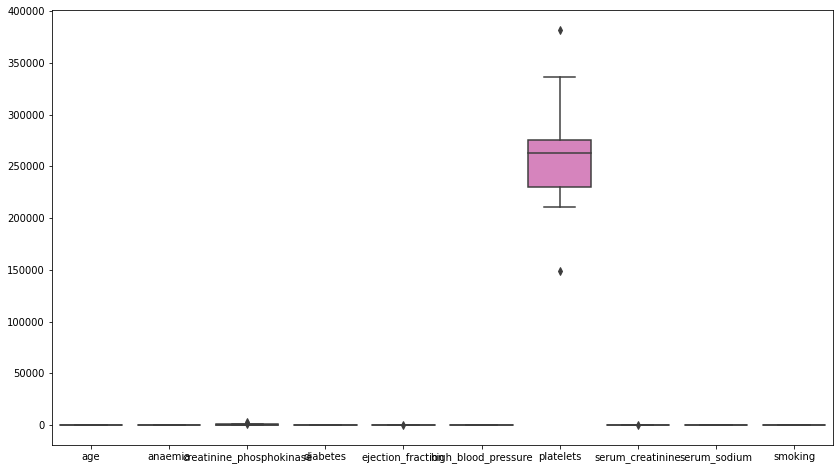

In [593]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data_inf_test)

In [594]:
def calc_outlier(new_df, col):
    #cari iqr menggunakan quantile 25% dan 75%
    q1 = np.quantile(new_df[col], 0.25)
    q3 = np.quantile(new_df[col], 0.75)
    iqr = q3 - q1

    #cari batas atas dan batas bawah
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    
    print('batas atas dari {} : {} '.format(col, upper))
    print('batas bawah dari {} : {} '.format(col, lower))

    #capping kolom menggunakan batas atas dan batas bawah
    new_df[col] = np.where(
    new_df[col] > upper,
    upper,
    np.where(
        new_df[col] < lower,
        lower,
        new_df[col]
        )
    )

In [595]:
calc_outlier(data_inf_test, 'platelets')

batas atas dari platelets : 341973.76875000005 
batas bawah dari platelets : 163615.73875 


In [596]:
y_pred_inf = rfc_tunned.predict(data_inf_test)

In [597]:
y_pred_inf

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [598]:
pd.DataFrame(y_pred_inf, data_inf['DEATH_EVENT'], columns=['deposit - Inference_predict']).reset_index()

,DEATH_EVENT,deposit - Inference_predict
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


#### Note   :
1.  Perbandingan antara prediksi data inference dengan data realnya, akurasi yaitu 100%, namun karena model overfitting, maka perlu dimodifikasi sehingga akurasi dari data inference tidak berlaku

---
---
## Pengambilan Keputusan

1.  Berdasarkan nilai dari cross val score, maka didapat bahwa model Random Forest lebih besar akurasinya terhdap model GDB1.   
2.  Namun Setelah dituning hyperparamternya, terjadi peningkatan sebelum dan sesudah dituning dikedua model
3.  Dari cross val score setelah dituning hyperparmeter, Random Forest lebih baik dengan score 0.75
4.  Dari f1 scorenya setelah dituning, GDB lebih baik dengan score 0.75
5.  Dari Confusion matrixnya didapat bahwa, GDB lebih unggul dengan 46 prediksi benar, dan 12 prediksi salah
6.  Kedua model mengalami overfitting, karena training datanya, sangat jauh lebih besar ketimbang data testnya
7.  Model Infernce memiliki akurasi 100% dari 10 sample, namun karena model overfitting, maka perlu dikaji ulang dengan feature, model ataupun parameter yang berbeda